# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
#pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
#cities = cities[:20]

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_latitude = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitude, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 2 of Set 1 | fort nelson
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | mogadishu
Processing Record 5 of Set 1 | pavilosta
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | sao joao da barra
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | meulaboh
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | los llanos de aridane
Processing Record 14 of Set 1 | mchinji
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | beloha
Processing Record 21 of Set 1 | uk

Processing Record 39 of Set 4 | dogondoutchi
Processing Record 40 of Set 4 | jacareacanga
Processing Record 41 of Set 4 | ponta do sol
Processing Record 42 of Set 4 | dwarka
Processing Record 43 of Set 4 | crab hill
City not found. Skipping...
Processing Record 44 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 45 of Set 4 | shingu
Processing Record 46 of Set 4 | gashua
Processing Record 47 of Set 4 | gornopravdinsk
Processing Record 48 of Set 4 | stoyba
City not found. Skipping...
Processing Record 49 of Set 4 | jalu
Processing Record 0 of Set 5 | mira
Processing Record 1 of Set 5 | zhezkazgan
Processing Record 2 of Set 5 | vila velha
Processing Record 3 of Set 5 | lavrentiya
Processing Record 4 of Set 5 | sorland
Processing Record 5 of Set 5 | khandyga
Processing Record 6 of Set 5 | grand gaube
Processing Record 7 of Set 5 | dzhebariki-khaya
Processing Record 8 of Set 5 | bredasdorp
Processing Record 9 of Set 5 | belushya guba
City not found. Skipping...
Processi

Processing Record 23 of Set 8 | husavik
Processing Record 24 of Set 8 | arauco
Processing Record 25 of Set 8 | ust-bolsheretsk
City not found. Skipping...
Processing Record 26 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 27 of Set 8 | tiksi
Processing Record 28 of Set 8 | ipixuna
Processing Record 29 of Set 8 | calabozo
Processing Record 30 of Set 8 | okhotsk
Processing Record 31 of Set 8 | ambilobe
Processing Record 32 of Set 8 | sur
Processing Record 33 of Set 8 | williston
Processing Record 34 of Set 8 | longyearbyen
Processing Record 35 of Set 8 | barquisimeto
Processing Record 36 of Set 8 | mazamet
Processing Record 37 of Set 8 | nishihara
Processing Record 38 of Set 8 | comarapa
Processing Record 39 of Set 8 | berlevag
Processing Record 40 of Set 8 | pochutla
Processing Record 41 of Set 8 | kudahuvadhoo
Processing Record 42 of Set 8 | phan rang
City not found. Skipping...
Processing Record 43 of Set 8 | teneguiban
City not found. Skipping...
Processing R

Processing Record 12 of Set 12 | sile
Processing Record 13 of Set 12 | bereda
Processing Record 14 of Set 12 | vaitape
Processing Record 15 of Set 12 | pitkyaranta
Processing Record 16 of Set 12 | babanusah
City not found. Skipping...
Processing Record 17 of Set 12 | miri
Processing Record 18 of Set 12 | stornoway
Processing Record 19 of Set 12 | saint anthony
Processing Record 20 of Set 12 | burns lake
Processing Record 21 of Set 12 | pogar
Processing Record 22 of Set 12 | kahului
Processing Record 23 of Set 12 | key west
Processing Record 24 of Set 12 | iguguno
Processing Record 25 of Set 12 | mengcheng
Processing Record 26 of Set 12 | avera
Processing Record 27 of Set 12 | vanavara
Processing Record 28 of Set 12 | benguela
Processing Record 29 of Set 12 | westpunt
City not found. Skipping...
Processing Record 30 of Set 12 | colares
Processing Record 31 of Set 12 | marawi
Processing Record 32 of Set 12 | balintore
Processing Record 33 of Set 12 | sharjah
Processing Record 34 of Set 1

In [21]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url+"london")
json= response.json()
print (json)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 2.37, 'feels_like': 0.89, 'temp_min': -0.05, 'temp_max': 4.49, 'pressure': 1036, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 230}, 'clouds': {'all': 44}, 'dt': 1675984755, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1675927583, 'sunset': 1675962188}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [50]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [51]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort nelson,58.8053,-122.7002,-7.25,76,100,0.45,CA,1675984544
1,atuona,-9.8000,-139.0333,26.21,77,17,9.70,PF,1675984824
2,mogadishu,2.0371,45.3438,25.13,84,9,6.98,SO,1675984775
3,pavilosta,56.8879,21.1859,2.95,81,96,12.73,LV,1675984824
4,carnarvon,-24.8667,113.6333,25.21,78,87,8.27,AU,1675984770


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort nelson,58.8053,-122.7002,-7.25,76,100,0.45,CA,1675984544
1,atuona,-9.8000,-139.0333,26.21,77,17,9.70,PF,1675984824
2,mogadishu,2.0371,45.3438,25.13,84,9,6.98,SO,1675984775
3,pavilosta,56.8879,21.1859,2.95,81,96,12.73,LV,1675984824
4,carnarvon,-24.8667,113.6333,25.21,78,87,8.27,AU,1675984770


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

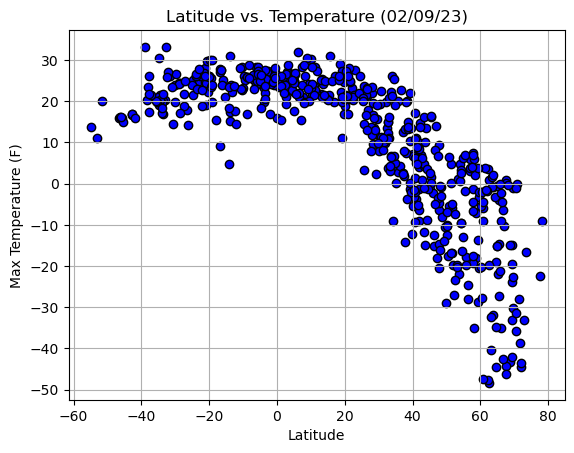

In [54]:
lat=city_data_df["Lat"]
temp=city_data_df["Max Temp"]

# Build scatter plot for latitude vs. temperature
plt.scatter(lat,temp,marker="o",facecolors="b",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

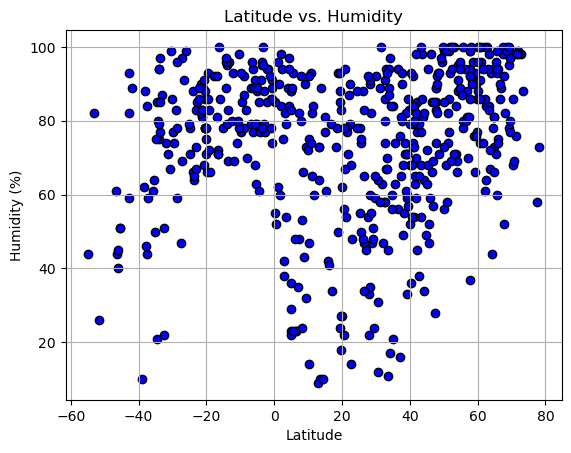

In [86]:
lat =city_data_df["Lat"]
humidity=city_data_df["Humidity"]
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat_2,humidity,marker="o",facecolors="b",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

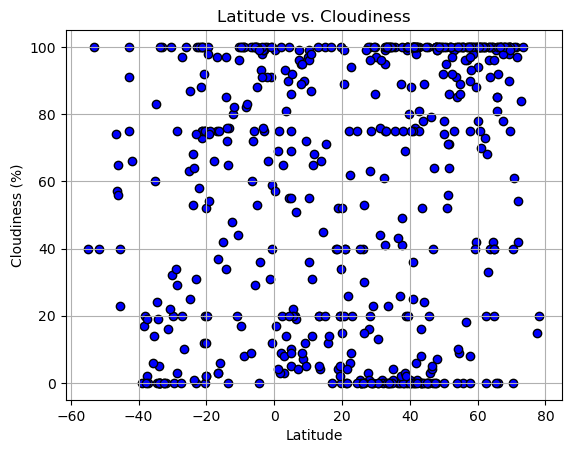

In [85]:
lat =city_data_df["Lat"]
clouds=city_data_df["Cloudiness"]
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat_3,clouds,marker="o",facecolors="b",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

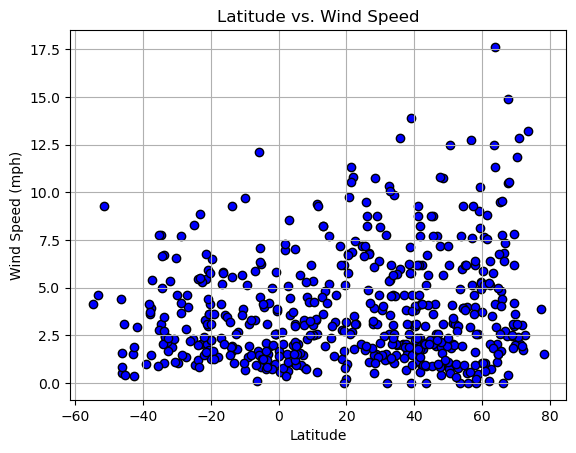

In [83]:
lat =city_data_df["Lat"]
wind=city_data_df["Wind Speed"]
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat_4,wind,marker="o",facecolors="b",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values, text_coordinates):     
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="r")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort nelson,58.8053,-122.7002,-7.25,76,100,0.45,CA,1675984544
2,mogadishu,2.0371,45.3438,25.13,84,9,6.98,SO,1675984775
3,pavilosta,56.8879,21.1859,2.95,81,96,12.73,LV,1675984824
6,jamestown,42.0970,-79.2353,14.77,77,100,4.12,US,1675984827
7,torbay,47.6666,-52.7314,-6.35,83,100,7.20,CA,1675984670


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atuona,-9.8000,-139.0333,26.21,77,17,9.70,PF,1675984824
4,carnarvon,-24.8667,113.6333,25.21,78,87,8.27,AU,1675984770
5,sao joao da barra,-21.6403,-41.0511,25.05,90,88,3.31,BR,1675984826
12,mchinji,-13.7984,32.8802,17.43,95,72,1.68,MW,1675984830
13,arraial do cabo,-22.9661,-42.0278,24.98,83,0,2.06,BR,1675984830


###  Temperature vs. Latitude Linear Regression Plot

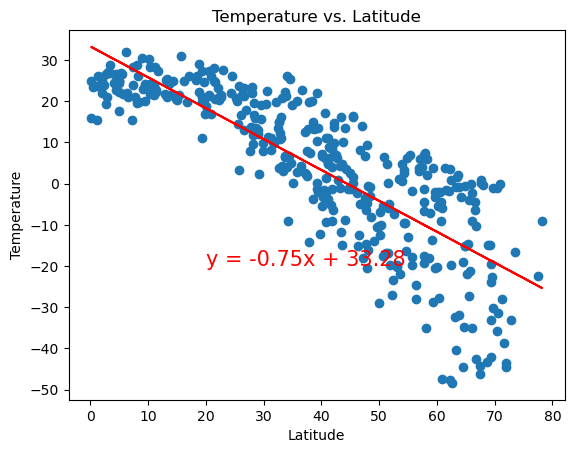

In [73]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Temperature"
title="Temperature vs. Latitude"
regression(x_values, y_values, text_coordinates=(20,-20))

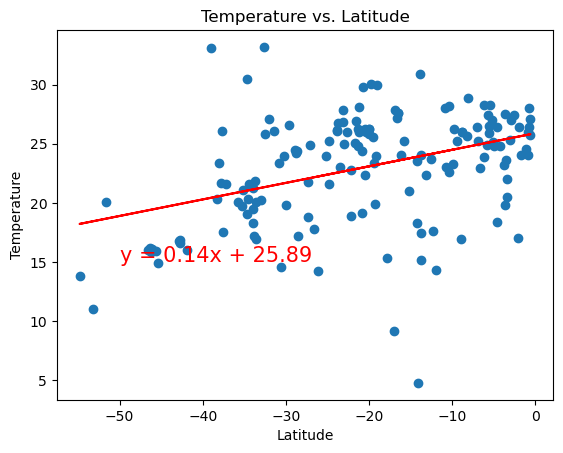

In [72]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Temperature"
title="Temperature vs. Latitude"
regression(x_values, y_values, text_coordinates=(-50,15))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

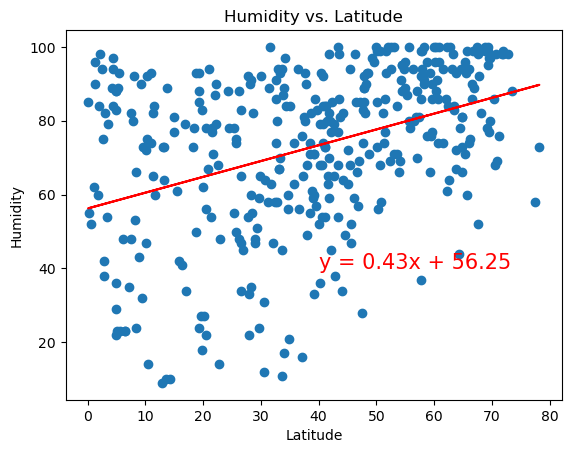

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title="Humidity vs. Latitude"
regression(x_values, y_values, text_coordinates=(40,40))

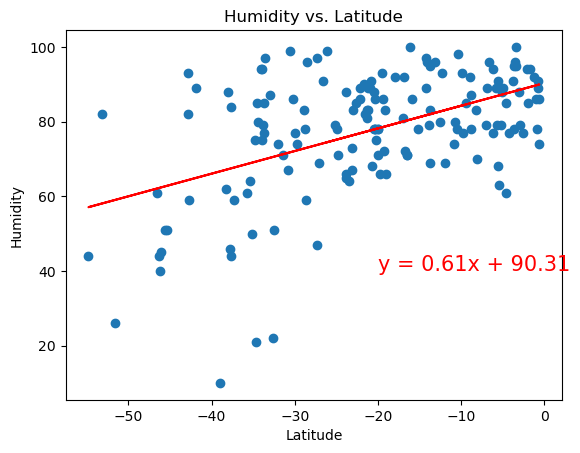

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title="Humidity vs. Latitude"
regression(x_values, y_values, text_coordinates=(-20,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

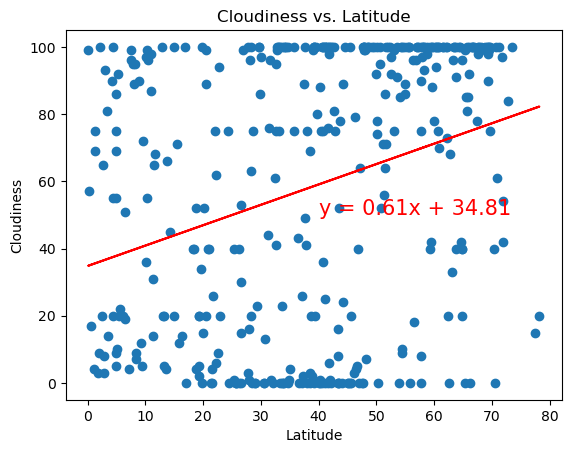

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title="Cloudiness vs. Latitude"
regression(x_values, y_values, text_coordinates=(40,50))

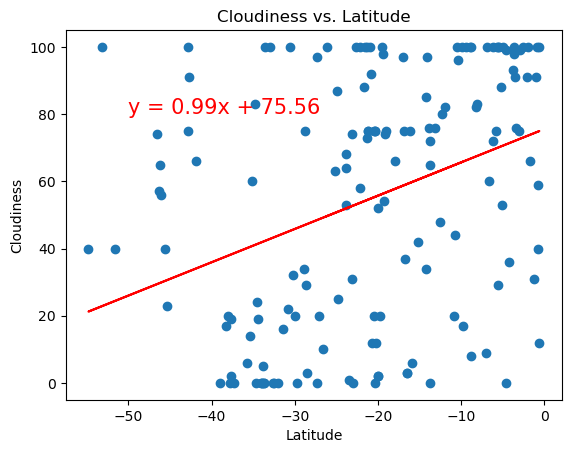

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title="Cloudiness vs. Latitude"
regression(x_values, y_values, text_coordinates=(-50,80))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

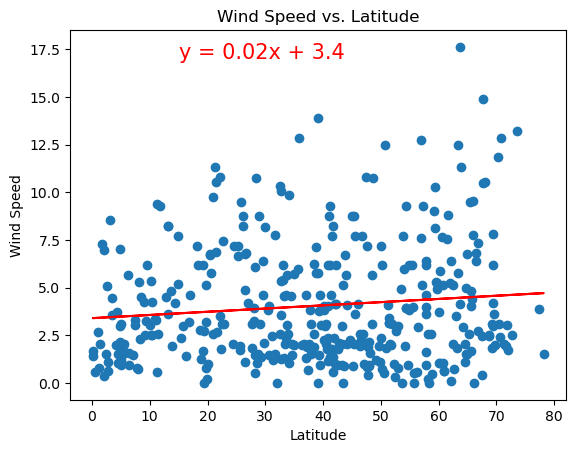

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title="Wind Speed vs. Latitude"
regression(x_values, y_values, text_coordinates=(15,17))

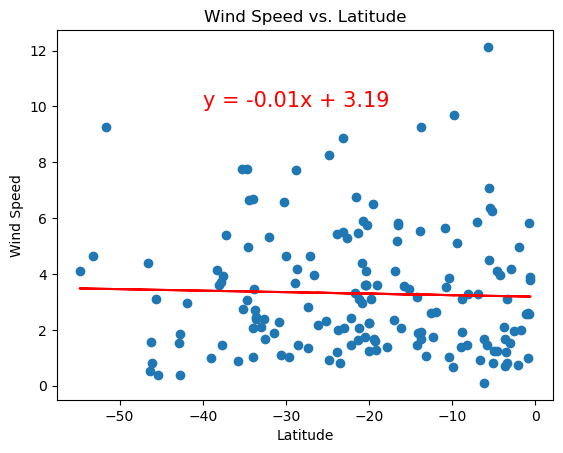

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title="Wind Speed vs. Latitude"
regression(x_values, y_values, text_coordinates=(-40,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Higher the temperature the lower the latitude